In [1]:
using Makie
#using Plots
using QuadGK
using Dierckx
#using ColorSchemes

┌ Info: Precompiling Makie [ee78f7c6-11fb-53f2-987a-cfe4a2b5a57a]
└ @ Base loading.jl:1187


In [2]:
scene = Scene(resolution = (500, 500))

#f(t, s, r0) = (r0*(cos(t*r0+s)+cos(t*r0-s))/2*cos(s), r0*(cos(t*r0+s)+cos(t*r0-s))/2*sin(s))
n = 0
f(t, s, r0) = (r0*cos(t*r0)*cos(n*s)*cos(s), r0*cos(t*r0)*cos(n*s)*sin(s))
f(t,s) = f(t, s, 1)
time = Node(0.0)
p1 = lines!(scene, lift(t-> f.(t, range(0, stop = 2pi, length = 200)), time), limits = FRect(-1.2, -1.2, 2.4, 2.4))[end]
N = 150
record(scene, "D:\\Documents\\Diplomka\\string"*"$n"*".mp4", linspace(0, 10, N)) do i
    push!(time, i)
end

┌ Warning: `linspace(start, stop, length::Integer)` is deprecated, use `range(start, stop=stop, length=length)` instead.
│   caller = top-level scope at In[2]:10
└ @ Core In[2]:10


"D:\\Documents\\Diplomka\\string0.mp4"

In [3]:
function des_integral(R,E,sgn)
    sqrt(E^2*R^2 + sgn*2*E*R*sqrt(E^2 - R^2 + R^4) + E^2 - R^4 + R^6)/(R*sqrt(E^2*R^2 + sgn*2*E*R*sqrt(E^2 - R^2 + R^4) + E^2 - R^4 + R^6) - E*R - sgn*sqrt(E^2 - R^2 + R^4))
end

des_integral (generic function with 1 method)

In [4]:
energy1(R0) = R0*sqrt(1-R0^2)
energy2(R0) = R0*(1+R0^2)/sqrt(1-R0^2)

energy2 (generic function with 1 method)

In [5]:
R0 = 1/sqrt(2)

0.7071067811865475

In [6]:
E = energy1(R0)

0.5

In [7]:
des_integral1(x) = des_integral(x,E, 1)
des_integralm1(x) = des_integral(x,E, -1)

des_integralm1 (generic function with 1 method)

In [8]:
step = 0.001
R = R0-step:-step:-R0+step;

In [9]:
result1 = [quadgk(des_integral1, 0, R[i]) for i = 1:size(R,1)]
resultm1 = [quadgk(des_integralm1, 0, R[i]) for i = 1:size(R,1)];

In [10]:
@show t0 = maximum([result1[i][1] for i = 1:size(result1,1)]) - minimum([resultm1[i][1] for i = 1:size(resultm1,1)])
aa = [[[result1[i][1] for i = 1:size(result1,1)][1:end-1]
        [t0+resultm1[i][1] for i = 1:size(resultm1,1)][end:-1:1]
    [2*t0+result1[i][1] for i = 1:size(result1,1)][1:end-1]
    [3*t0+resultm1[i][1] for i = 1:size(resultm1,1)][end:-1:1]] [R[1:end-1]
        R[end:-1:1]
        R[1:end-1]
R[end:-1:1]]];

t0 = maximum([(result1[i])[1] for i = 1:size(result1, 1)]) - minimum([(resultm1[i])[1] for i = 1:size(resultm1, 1)]) = 8.226319576571832


In [11]:
sorta = sortperm(aa[:,1]);

In [12]:
spl = Spline1D(aa[:,1][sorta], aa[:,2][sorta])

Spline1D(knots=[-4.59487,-3.81821 … 27.8124,28.5835] (5648 elements), k=3, extrapolation="nearest", residual=0.0)

In [13]:
minimum(aa[:,1]):0.1:maximum(aa[:,1])

-4.594870920890465:0.1:28.505129079109537

┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1187


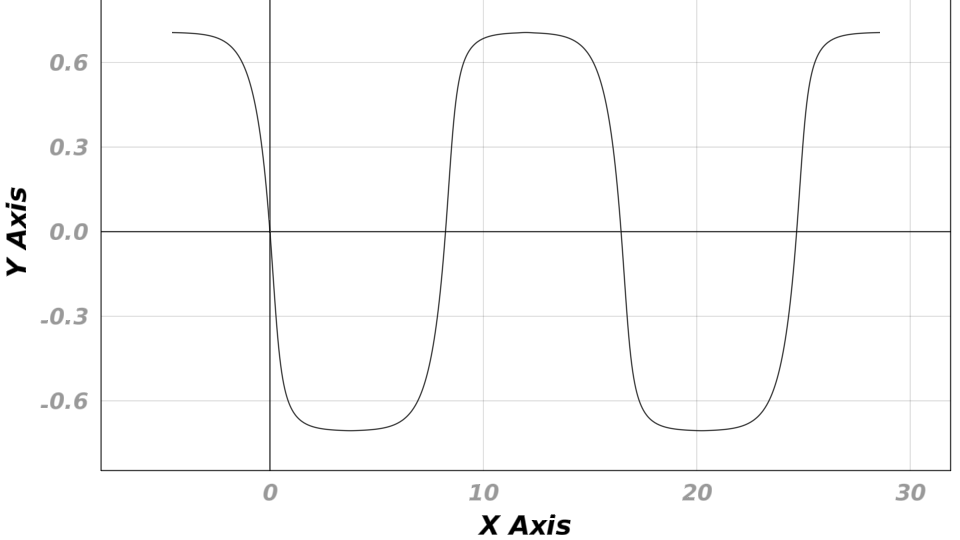

In [14]:
lines(minimum(aa[:,1]):0.01:maximum(aa[:,1]), spl(minimum(aa[:,1]):0.01:maximum(aa[:,1])))

In [34]:
scene = Scene(resolution = (1000, 1000))

ff(t, s) = (sin(t)*cos(s), sin(t)*sin(s))
time = Node(minimum(aa[:,1]))
p1 = lines!(scene, lift(t-> ff.(t, range(0, stop = 2pi, length = 300)), time), color = :blue, linewidth = 3)
N = 300
time_arr = range(minimum(aa[:,1]), stop = maximum(aa[:,1]), length = N)
for i = 1:size(time_arr,1)
    
Makie.save("D:\\Documents\\Diplomka\\Animations\\string_flat\\string_flat_$(i).png",scene)
    push!(time, time_arr[i])
end

In [36]:
scene = Scene(resolution = (1000, 1000))

ff(t, s) = (spl(t)*cos(s), spl(t)*sin(s))
time = Node(minimum(aa[:,1]))
p1 = lines!(scene, lift(t-> ff.(t, range(0, stop = 2pi, length = 300)), time), color = :blue, linewidth = 3)
N = 300
time_arr = range(minimum(aa[:,1]), stop = maximum(aa[:,1]), length = N)
for i = 1:size(time_arr,1)
    
Makie.save("D:\\Documents\\Diplomka\\Animations\\string_desitter\\string_desitter_$(i).png",scene)
    push!(time, time_arr[i])
end

In [ ]:
scene = Scene(resolution = (1000, 1000))

ff(t, s) = (sin(t)*cos(s), sin(t)*sin(s))
time = Node(minimum(aa[:,1]))
p1 = lines!(scene, lift(t-> ff.(t, range(0, stop = 2pi, length = 300)), time), color = :blue, linewidth = 3)
N = 300
record(scene, "D:\\Documents\\Diplomka\\Animations\\string_flat.gif", range(minimum(aa[:,1]), stop = maximum(aa[:,1]), length = N)) do i
    push!(time, i)
end

In [29]:
scene = Scene(resolution = (1000, 1000))

ff(t, s) = (spl(t)*cos(s), spl(t)*sin(s))
time = Node(minimum(aa[:,1]))
p1 = lines!(scene, lift(t-> ff.(t, range(0, stop = 2pi, length = 300)), time), color = :blue, linewidth = 3)
N = 1000
record(scene, "D:\\Documents\\Diplomka\\Animations\\string_desitter.gif", range(minimum(aa[:,1]), stop = maximum(aa[:,1]), length = N)) do i
    push!(time, i)
end

"D:\\Documents\\Diplomka\\Animations\\string_desitter.gif"

In [16]:
scene = Scene(resolution = (1000, 1000))

f(t, v, s) = (sin(v + t) * s, cos(v + t) * s, (cos(v + t) + sin(v)) * s)
t = Node(Base.time()) # create a life signal
limits = FRect3D(Vec3f0(-1.5, -1.5, -3), Vec3f0(3, 3, 6))
p1 = meshscatter!(scene, lift(t-> f.(t, linspace(0, 2pi, 50), 1), t), markersize = 0.05)[end]
p2 = meshscatter!(scene, lift(t-> f.(t * 2.0, linspace(0, 2pi, 50), 1.5), t), markersize = 0.05)[end]

lines = lift(p1[1], p2[1]) do pos1, pos2
    map((a, b)-> (a, b), pos1, pos2)
end
linesegments!(scene, lines, linestyle = :dot, limits = limits)
# record a video
N = 150
record(scene, "D:\\Documents\\Diplomka\\Animations\\test.mp4", 1:N) do i
    push!(t, Base.time())
end

┌ Warning: `linspace(start, stop, length::Integer)` is deprecated, use `range(start, stop=stop, length=length)` instead.
│   caller = (::getfield(Main, Symbol("##27#28")))(::Float64) at In[16]:6
└ @ Main .\In[16]:6
┌ Warning: `linspace(start, stop, length::Integer)` is deprecated, use `range(start, stop=stop, length=length)` instead.
│   caller = (::getfield(Main, Symbol("##29#30")))(::Float64) at In[16]:7
└ @ Main .\In[16]:7


ErrorException: cannot assign variable AbstractPlotting.lines from module Main

In [ ]:
t00 = 0.0
t_fin = 3*pi
r0 = 1.0
n = 0
N = 100
k = 0

scene = Scene(resolution = (1000, 1000))

f(t, s, r0, n) = (r0*cos(t/r0)*cos(n*s+k*pi/2)*cos(s), r0*cos(t/r0)*cos(n*s+k*pi/2)*sin(s))


function surf_func(t0, t_fin, N, n, r0)
    t_range = range(t0, stop = t_fin+t0, length = N)
    s_range = range(0, stop = 2pi, length = N)
    srf = [f(t, s, r0, n) for t in t_range, s in s_range]
    x = [srf[i,j][1] for i = 1:N, j = 1:N]
    y = [srf[i,j][2] for i = 1:N, j = 1:N]
    z = [t-t_fin for t in t_range, s in s_range]
    return x, y, z
end



x, y, z = surf_func(t00, t_fin, N, n, r0)

surf = surface!(scene, z, x, y, colormap = :Blues)[end]
str = lines!(scene, z[end,:], x[end,:], y[end,:], color = :red, linewidth = 2, limits = FRect3D(Vec3f0(-10, -1.1, -1.1), Vec3f0(20, 2.2, 2.2)))[end]
update_cam!(scene, Vec3f0(4, 8, 8), Vec3f0(-3, 0, 0))

record(scene, "D:\\Documents\\Diplomka\\Animations\\string_surf"*"$n"*".mp4", range(t00, stop = t_fin, length = 300)) do i
    x, y, z = surf_func(i, t_fin, N, n, r0)
    surf[1] = z
    surf[2] = x
    surf[3] = y
    str[1] = z[end,:]
    str[2] = x[end,:]
    str[3] = y[end,:]
    update_cam!(scene, Vec3f0(4+i, 8, 8), Vec3f0(-3+i, 0, 0))
end


In [ ]:
N = 100

scene = Scene(resolution = (1000, 1000))


f(t, s) = (spl(t)*cos(s), spl(t)*sin(s))

function surf_func(t, N)
    t_fin = maximum(t)
    s_range = range(0, stop = 2pi, length = N)
    srf = [f(t[i], s) for i = 1:size(t,1) for s in s_range]
    x = [srf[i,j][1] for i = 1:N, j = 1:N]
    y = [srf[i,j][2] for i = 1:N, j = 1:N]
    z = [t[i]-t_fin for i = 1:size(t,1), s in s_range]
    return x, y, z
end

x, y, z = surf_func(aa[:,1], N)

surf = surface!(scene, z, x, y, colormap = :Blues)[end]
str = lines!(scene, z[end,:], x[end,:], y[end,:], color = :red, linewidth = 2, limits = FRect3D(Vec3f0(-10, -1.1, -1.1), Vec3f0(20, 2.2, 2.2)))[end]
update_cam!(scene, Vec3f0(4, 8, 8), Vec3f0(-3, 0, 0))

record(scene, "D:\\Documents\\Diplomka\\Animations\\string_surf_desitter"*"$n"*".mp4", range(t00, stop = t_fin, length = 300)) do i
    x, y, z = surf_func(i, t_fin, N, n, r0)
    surf[1] = z
    surf[2] = x
    surf[3] = y
    str[1] = z[end,:]
    str[2] = x[end,:]
    str[3] = y[end,:]
    update_cam!(scene, Vec3f0(4+i, 8, 8), Vec3f0(-3+i, 0, 0))
end
